# Data Preprocessing

## Library Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Data Imports

In [50]:
heart = pd.read_csv('data.csv')

## EDA (Exploratory Data Analysis)

In [52]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [53]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
288,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
289,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
290,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
291,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
292,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


In [54]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         293 non-null    int64  
 1   sex         293 non-null    int64  
 2   cp          293 non-null    int64  
 3   trestbps    293 non-null    object 
 4   chol        293 non-null    object 
 5   fbs         293 non-null    object 
 6   restecg     293 non-null    object 
 7   thalach     293 non-null    object 
 8   exang       293 non-null    object 
 9   oldpeak     293 non-null    float64
 10  slope       293 non-null    object 
 11  ca          293 non-null    object 
 12  thal        293 non-null    object 
 13  num         293 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.2+ KB


In [55]:
heart.describe()

,age,sex,cp,oldpeak,num
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,0.588055,0.361775
std,7.824875,0.446282,0.965049,0.909554,0.481336
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [56]:
heart.shape

(293, 14)

## Handling Missing Value

In [58]:
data = heart.replace('?',pd.NA)

In [59]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,<NA>,<NA>,<NA>,0
1,29,1,2,120,243,0,0,160,0,0.0,<NA>,<NA>,<NA>,0
2,29,1,2,140,<NA>,0,0,170,0,0.0,<NA>,<NA>,<NA>,0
3,30,0,1,170,237,0,1,170,0,0.0,<NA>,<NA>,6,0
4,31,0,2,100,219,0,1,150,0,0.0,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160,331,0,0,94,1,2.5,<NA>,<NA>,<NA>,1
289,54,0,3,130,294,0,1,100,1,0.0,2,<NA>,<NA>,1
290,56,1,4,155,342,1,0,150,1,3.0,2,<NA>,<NA>,1
291,58,0,2,180,393,0,0,110,1,1.0,2,<NA>,7,1


In [60]:
heart.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [61]:
data = data.apply(pd.to_numeric,errors = 'ignore')

In [62]:
data.isna().sum()

age             0
sex             0
cp              0
trestbps        1
chol           22
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         189
ca            290
thal          265
num             0
dtype: int64

In [63]:
imputer = SimpleImputer(strategy='mean')

In [64]:
num_columns = data.select_dtypes(include=[np.number]).columns

In [65]:
data[num_columns] = pd.DataFrame(imputer.fit_transform(data[num_columns]), columns=num_columns)

In [66]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28.0,1.0,2.0,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857,0.0
1,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0.0
2,29.0,1.0,2.0,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857,0.0
3,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000,0.0
4,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52.0,1.0,4.0,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.894231,0.0,5.642857,1.0
289,54.0,0.0,3.0,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.000000,0.0,5.642857,1.0
290,56.0,1.0,4.0,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.000000,0.0,5.642857,1.0
291,58.0,0.0,2.0,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.000000,0.0,7.000000,1.0


In [67]:
print(data.isnull().sum())

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


## Feature Engineering

In [69]:
data.columns = data.columns.str.strip()
data['num'] = data['num'].astype('category')

## Handling Outlier

## Data Visualization

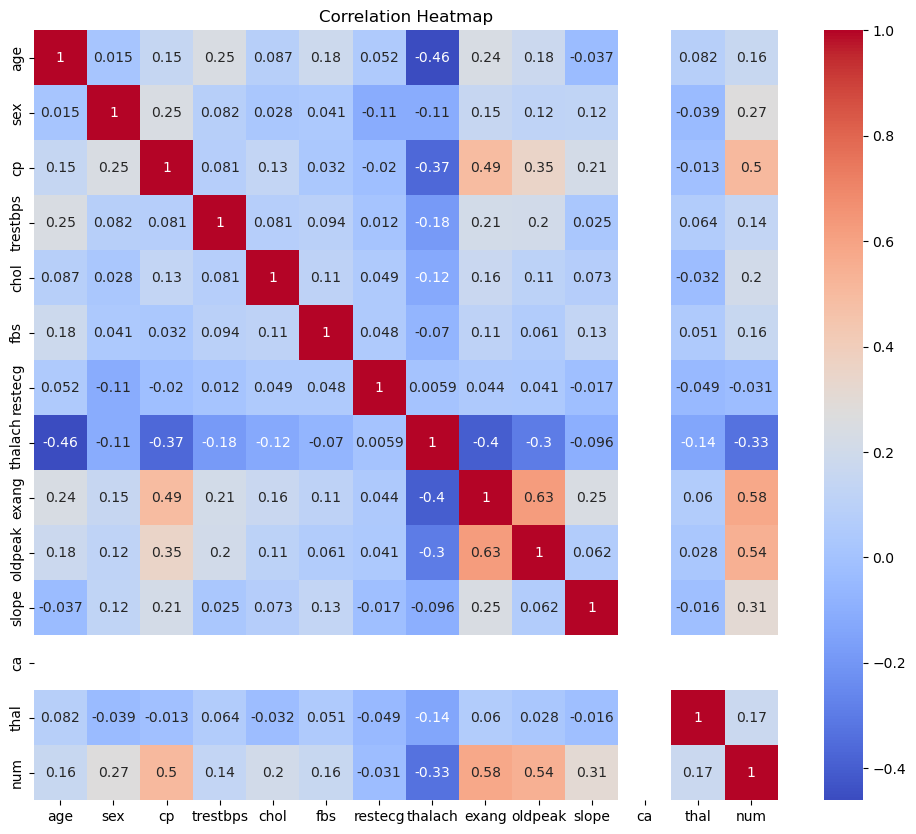

In [72]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

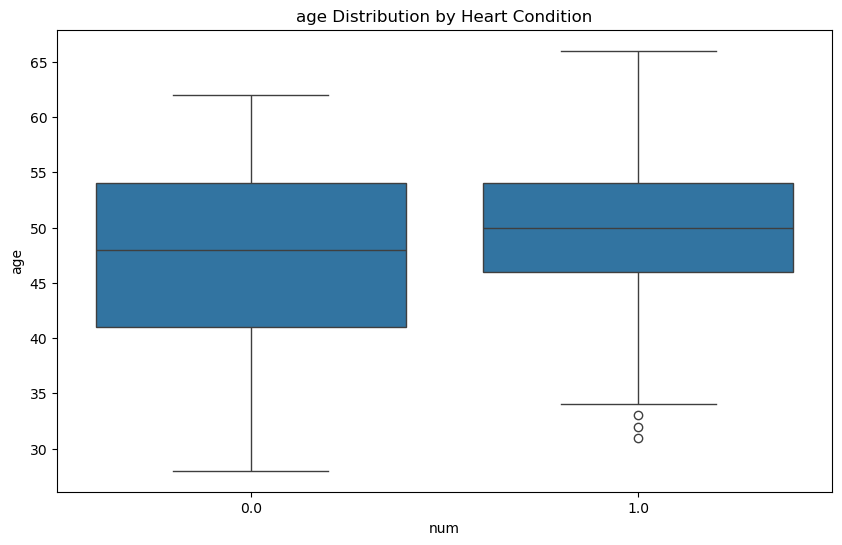

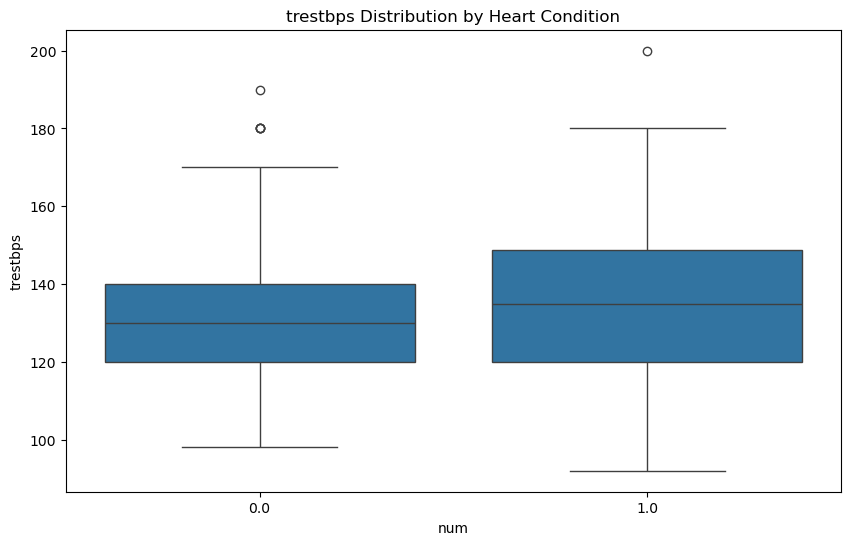

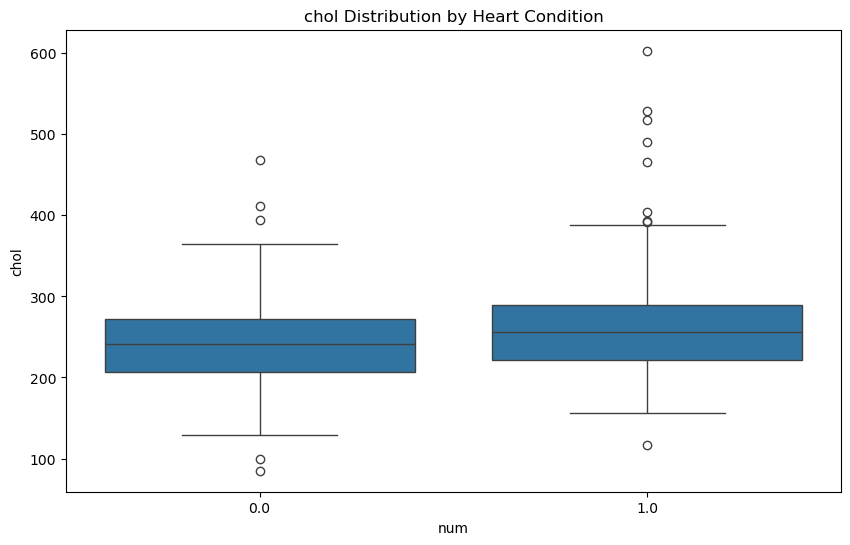

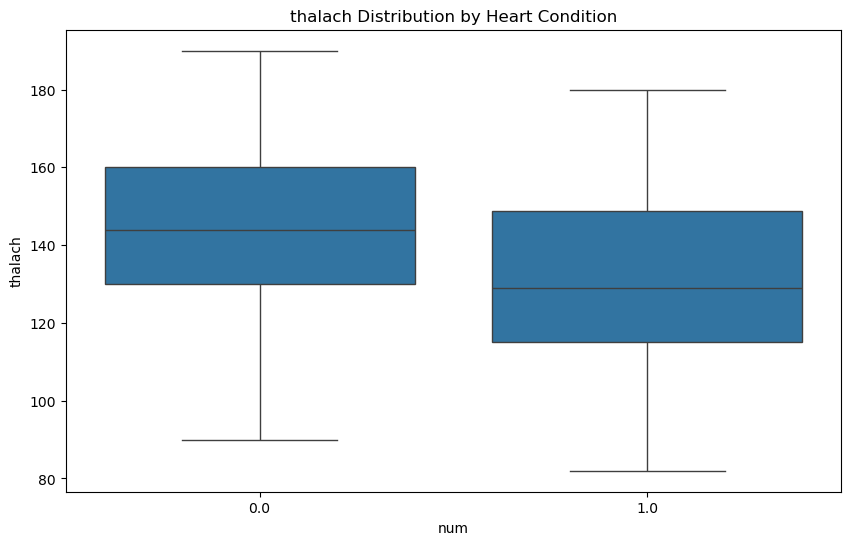

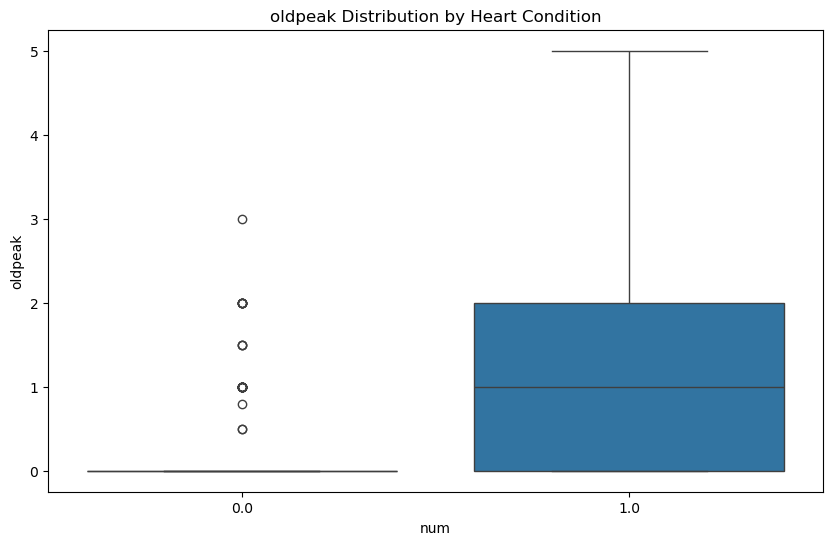

In [73]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='num', y=col, data=data)
    plt.title(f'{col} Distribution by Heart Condition')
    plt.show()

# Model Building

## Train Test Split 

In [76]:
X = data.drop('num', axis=1)
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Initalization

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
knn_classifier = KNeighborsClassifier()

## Model Training

In [86]:
y_pred = best_knn_classifier.predict(X_test_scaled)

## Hyper Parameter Tuining

In [82]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [84]:
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [85]:
best_knn_classifier = grid_search.best_estimator_

# Evaluation and Result

In [90]:
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.864406779661017
